# Back-Propagation XOR

In [146]:
import numpy as np
import matplotlib.pyplot as plt
class BackPNN(object):
    def __init__(self, capas = [2 , 10, 1], activaciones=['sigmoid', 'sigmoid']):
        assert(len(capas) == len(activaciones)+1)
        self.capas = capas
        self.activaciones = activaciones
        self.ws = []
        self.biases = []
        for i in range(len(capas)-1):
            self.ws.append(np.random.randn(capas[i+1], capas[i]))
            self.biases.append(np.random.randn(capas[i+1], 1))
        print(self.ws)
    @staticmethod
    def getFuncion(nombre):
        if(nombre == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(nombre == 'linear'):
            return lambda x : x
        elif(nombre == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            #print('Desconocida')
            return lambda x: x
    
    def feedforward(self, x):
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.ws)):
            funcion_activacion = self.getFuncion(self.activaciones[i])
            z_s.append(self.ws[i].dot(a) + self.biases[i])
            a = funcion_activacion(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    def backpropagation(self,y, z_s, a_s):
        dw = []  # dC/dW
        db = []  # dC/dB
        deltas = [None] * len(self.ws) 
        # insert the last layer error
        deltas[-1] = ((y-a_s[-1])*(self.getDerivadaFuncion(self.activaciones[-1]))(z_s[-1]))
        # Perform BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.ws[i+1].T.dot(deltas[i+1])*(self.getDerivadaFuncion(self.activaciones[i])(z_s[i]))        
            batch_size = y.shape[1]
            db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
            dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        return dw, db
    @staticmethod
    def getDerivadaFuncion(nombre):
        if(nombre == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(nombre == 'linear'):
            return lambda x: 1
        elif(nombre == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            #print('Desconocida')
            return lambda x: 1
    
    def entrenar(self, x, y, batch_size=10, epochs=100, lr = 0.01):
        error = []
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.ws = [w+lr*dweight for w,dweight in  zip(self.ws, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                #if e % 1000 == 0:
                    #print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
                error.append(np.linalg.norm(a_s[-1]-y_batch) )
        return error

# Experimento 1 relu

[array([[ 0.18170086, -1.18321348],
       [-0.76765518, -0.12102093]]), array([[-0.20274797,  0.23579242]])]


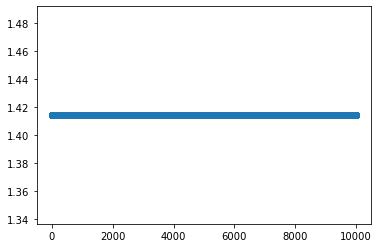

[[0.         1.07167456 0.         0.8899737 ]
 [0.         0.         0.48555858 0.6065795 ]]
[[0. 0. 0. 0.]]
[[1 1 0 0]
 [1 0 1 0]]


In [148]:
nn = BackPNN([2, 2, 1],activaciones=['relu', 'relu'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 2 relu

[array([[-0.17767744, -1.05991526],
       [-0.67369383,  1.21990663]]), array([[-0.46230985, -2.37067447]])]


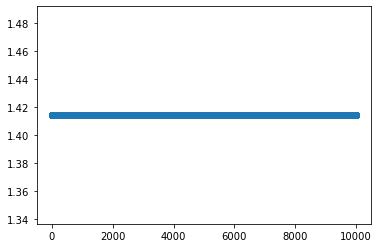

[[0.         0.35532362 0.         0.53300106]
 [2.15787034 0.93796371 2.83156418 1.61165754]]
[[0. 0. 0. 0.]]
[[1 1 0 0]
 [1 0 1 0]]


In [149]:
nn = BackPNN([2, 2, 1],activaciones=['relu', 'relu'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 3 relu

[array([[-0.65738795, -0.53833691],
       [ 0.73749452,  1.52782307]]), array([[-0.94540937,  0.03053004]])]


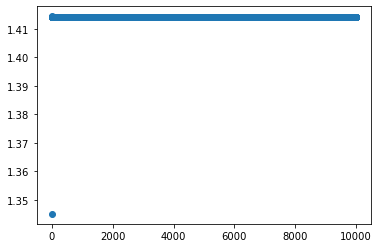

[[0.41888819 0.71369042 0.79525433 1.09005656]
 [1.87671805 0.35701805 1.14536788 0.        ]]
[[0. 0. 0. 0.]]
[[1 1 0 0]
 [1 0 1 0]]


In [151]:
nn = BackPNN([2, 2, 1],activaciones=['relu', 'relu'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 4 relu

[array([[ 0.02294033, -1.33047803],
       [-1.18183176, -0.19195082]]), array([[-0.26497356,  0.91833602]])]


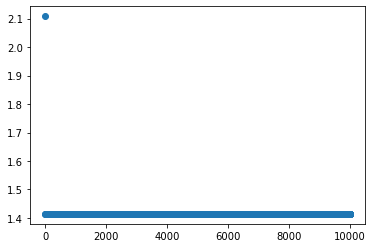

[[1.88213447 2.99652828 1.67874423 2.79313804]
 [0.         0.         0.         0.        ]]
[[0. 0. 0. 0.]]
[[1 1 0 0]
 [1 0 1 0]]


In [152]:
nn = BackPNN([2, 2, 1],activaciones=['relu', 'relu'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 5 relu

[array([[-0.13239217,  0.75734239],
       [ 0.27481499,  2.0954909 ]]), array([[1.46670612, 0.50127996]])]


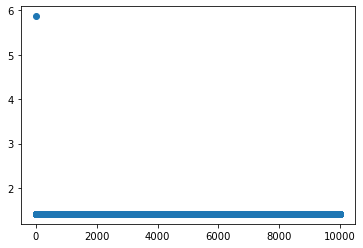

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[1 1 0 0]
 [1 0 1 0]]


In [156]:
nn = BackPNN([2, 2, 1],activaciones=['relu', 'relu'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 1 Sigmoid

[array([[-1.48308802, -0.73014411],
       [-0.54210417,  0.48611057]]), array([[ 1.18084119, -0.27136624]])]


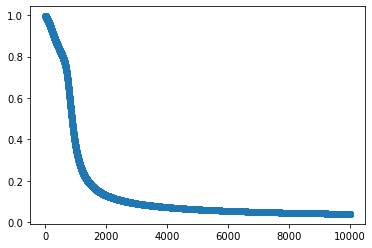

[[4.22591159e-05 2.19295132e-02 2.37916124e-02 9.28212935e-01]
 [8.28392772e-02 9.07256310e-01 9.08628249e-01 9.99072385e-01]]
[[0.97613608 0.01920751 0.01930203 0.98186227]]
[[1 1 0 0]
 [1 0 1 0]]


In [157]:
nn = BackPNN([2, 2, 1],activaciones=['sigmoid', 'sigmoid'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 2 Sigmoid

[array([[-0.08115095,  0.43718291],
       [ 0.23708255, -0.00156348]]), array([[ 2.2048178 , -0.55718664]])]


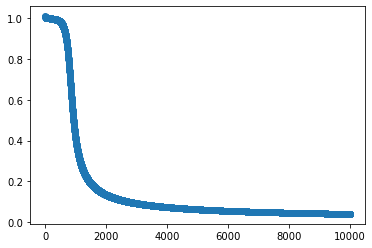

[[9.05478514e-01 6.93621511e-02 6.93463426e-02 5.79399349e-04]
 [9.99914580e-01 9.66418913e-01 9.66398336e-01 6.60373684e-02]]
[[0.9799776  0.01951233 0.01951305 0.97739061]]
[[1 1 0 0]
 [1 0 1 0]]


In [158]:
nn = BackPNN([2, 2, 1],activaciones=['sigmoid', 'sigmoid'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 3 Sigmoid

[array([[-1.69650304, -0.64935101],
       [-0.63441446,  0.63029569]]), array([[-0.28397277,  1.96245728]])]


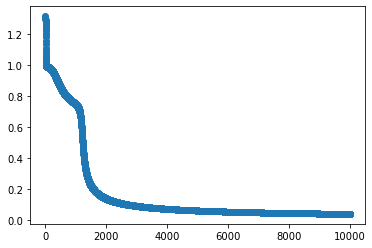

[[4.12799468e-02 2.58538699e-04 9.17916490e-01 6.29370736e-02]
 [9.61908335e-01 4.04729041e-02 9.99964453e-01 9.79161385e-01]]
[[0.98164341 0.02237417 0.01911879 0.98069329]]
[[1 1 0 0]
 [1 0 1 0]]


In [159]:
nn = BackPNN([2, 2, 1],activaciones=['sigmoid', 'sigmoid'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 4 Sigmoid

[array([[-0.89220695,  0.1136645 ],
       [-2.58180485, -0.47704404]]), array([[-0.4884341 ,  1.20974975]])]


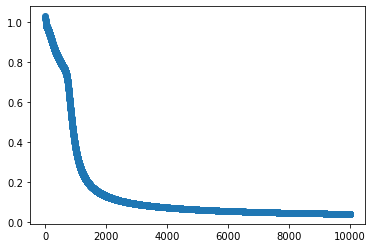

[[8.34211073e-02 9.05347649e-01 9.08263125e-01 9.99039854e-01]
 [3.97352255e-05 2.03643494e-02 2.43413212e-02 9.28833042e-01]]
[[0.97614672 0.01910548 0.01930922 0.98195038]]
[[1 1 0 0]
 [1 0 1 0]]


In [160]:
nn = BackPNN([2, 2, 1],activaciones=['sigmoid', 'sigmoid'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Experimento 5 Sigmoid

[array([[-0.49601978, -1.35873879],
       [-0.11880558, -0.54273507]]), array([[-0.61069581,  0.44660963]])]


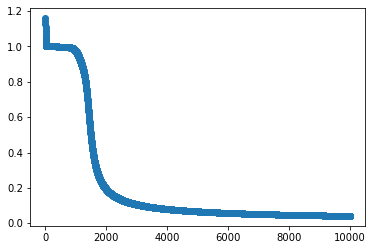

[[3.33447238e-02 9.38377274e-01 8.88060886e-05 3.77277036e-02]
 [9.53770099e-01 9.99828700e-01 5.67530257e-02 9.44512285e-01]]
[[0.98161511 0.0193388  0.0236541  0.97926139]]
[[1 1 0 0]
 [1 0 1 0]]


In [161]:
nn = BackPNN([2, 2, 1],activaciones=['sigmoid', 'sigmoid'])

y = np.array([[1,0,0,1]])
X = np.array([ [1,1],[1,0],[0,1],[0,0] ]).T
    
errores = nn.entrenar(X, y, epochs=10000, batch_size=4, lr = 1.5)
_, a_s = nn.feedforward(X)
plt.scatter(range(0,10000), errores)
plt.show()
print(a_s[-2])
print(a_s[-1])
print(a_s[-3])

# Conclusiones
- La representacion intermedia utilizando relu no me dio los resultados esperados 
- Dependiendo de la inicializacion el error no se logro reducir
- Implemente sigmoid para confirmar el funcionamiento de la red neuronal y funciono correctamente